In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation
from pypfopt.discrete_allocation import get_latest_prices
plt.style.use('fivethirtyeight')

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

# Informatikai szektor

In [3]:
#Intel - INTC
#Cisco - CSCO
#Verizon - VZ
#Wells Fargo - WFC
#Oracle - ORCL

it_szektor = ['INTC', 'CSCO', 'VZ', 'WFC', 'ORCL']

dataframe = pd.DataFrame()

for stock in it_szektor:
    dataframe[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Close']

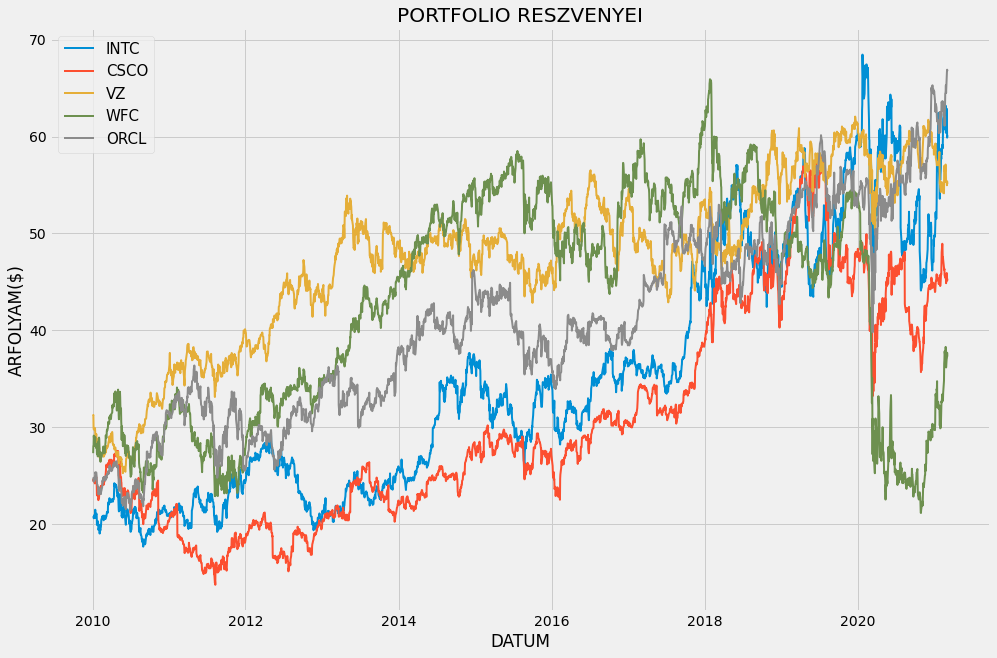

In [4]:
plt.figure(figsize=(15,10))

for t in dataframe.columns.values:
    plt.plot(dataframe[t], label = t, lw=2)
    plt.title('PORTFOLIO RESZVENYEI')


plt.xlabel('DATUM')
plt.ylabel('ARFOLYAM($)')
plt.legend(fontsize=15)
plt.show()

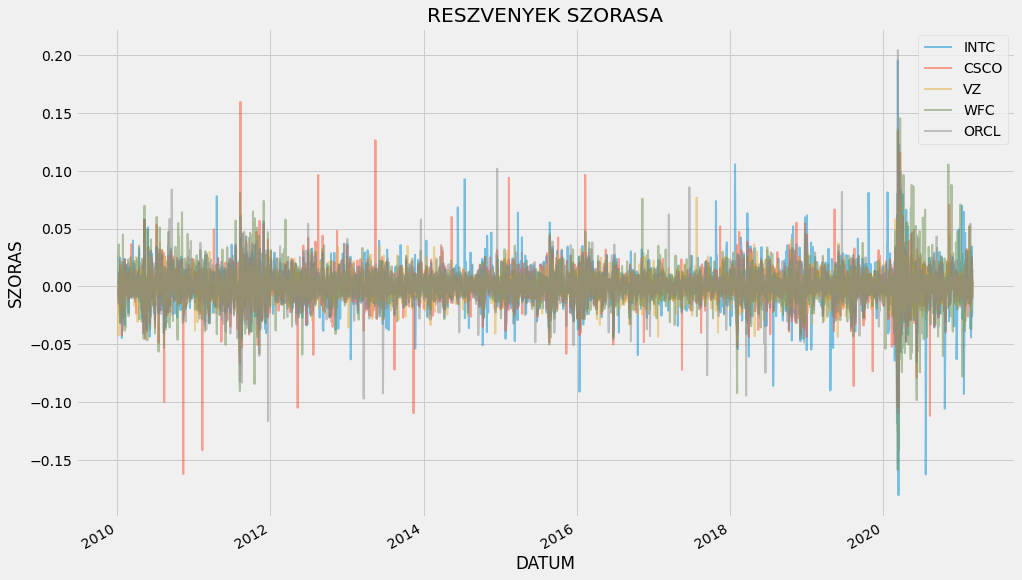

In [5]:
returns = dataframe.pct_change()
returns.plot(alpha=0.5, figsize=(15,10), lw=2)
plt.title('RESZVENYEK SZORASA')
plt.xlabel('DATUM')
plt.ylabel('SZORAS')
plt.show()

##### KOVARIANCIA MATRIX

In [6]:
# ~250 nap van egy evben
kov_matrix = returns.cov() * 250 
kov_matrix

,INTC,CSCO,VZ,WFC,ORCL
INTC,0.082182,0.040387,0.017381,0.039273,0.035941
CSCO,0.040387,0.072246,0.016568,0.038774,0.037423
VZ,0.017381,0.016568,0.031661,0.021418,0.016615
WFC,0.039273,0.038774,0.021418,0.087669,0.037592
ORCL,0.035941,0.037423,0.016615,0.037592,0.063495


##### KORRELACIO MATRIX

In [7]:
korr_matrix = returns.corr()
korr_matrix

,INTC,CSCO,VZ,WFC,ORCL
INTC,1.000000,0.524136,0.340740,0.462684,0.497553
CSCO,0.524136,1.000000,0.346425,0.487203,0.552545
VZ,0.340740,0.346425,1.000000,0.406525,0.370576
WFC,0.462684,0.487203,0.406525,1.000000,0.503851
ORCL,0.497553,0.552545,0.370576,0.503851,1.000000


##### HA CSAK...

In [8]:
#Intel-be:
intc_ret = np.sum(returns.loc[:, 'INTC'].mean()*250)*100
intc_vol = np.sqrt(kov_matrix.iloc[0,0])*100
print('Az INTC hozama: {:.2f}'.format(intc_ret)+'%')
print('Az INTC szorasa: {:.2f}'.format(intc_vol)+'%')

print('-----------------------')

#Cisco-ba:
csco_ret = np.sum(returns.loc[:, 'CSCO'].mean()*250)*100
csco_vol = np.sqrt(kov_matrix.iloc[1,1])*100
print('A CSCO hozama: {:.2f}'.format(csco_ret)+'%')
print('A CSCO szorasa: {:.2f}'.format(csco_vol)+'%')

print('-----------------------')

#Verizon-ba:
vz_ret = np.sum(returns.loc[:, 'VZ'].mean()*250)*100
vz_vol = np.sqrt(kov_matrix.iloc[2,2])*100
print('A VZ hozama: {:.2f}'.format(vz_ret)+'%')
print('A VZ szorasa: {:.2f}'.format(vz_vol)+'%')

print('-----------------------')

#Wells Fargo-ba:
wfc_ret = np.sum(returns.loc[:, 'WFC'].mean()*250)*100
wfc_vol = np.sqrt(kov_matrix.iloc[3,3])*100
print('A WFC hozama: {:.2f}'.format(wfc_ret)+'%')
print('A WFC szorasa: {:.2f}'.format(wfc_vol)+'%')

print('-----------------------')

#Oracle-be:
orcl_ret = np.sum(returns.loc[:, 'ORCL'].mean()*250)*100
orcl_vol = np.sqrt(kov_matrix.iloc[4,4])*100
print('Az ORCL hozama: {:.2f}'.format(orcl_ret)+'%')
print('Az ORCL szorasa: {:.2f}'.format(orcl_vol)+'%')

Az INTC hozama: 13.54%
Az INTC szorasa: 28.67%
-----------------------
A CSCO hozama: 9.04%
A CSCO szorasa: 26.88%
-----------------------
A VZ hozama: 6.64%
A VZ szorasa: 17.79%
-----------------------
A WFC hozama: 7.16%
A WFC szorasa: 29.61%
-----------------------
Az ORCL hozama: 11.96%
Az ORCL szorasa: 25.20%


##### PORTFOLIO HOZAM, SZORAS, SHARPE-MUTATO

In [63]:
weights = np.array([0.2, 0.1, 0.2, 0.2, 0.3]) #sulyok

port_variance = np.dot(weights.T, np.dot(kov_matrix, weights))

port_volatility = np.sqrt(port_variance)

port_return = np.sum(returns.mean() * weights) * 250

risk_free = 0.02 #2 szazalek

sharpe = ((port_return - risk_free) / port_volatility)

print('A portfolio eves hozama: {:.2f}'.format(port_return*100)+ '%')
print('A portfolio volatilitasa: {:.2f}'.format(port_volatility*100)+ '%')
print('Sharpe-mutato: {:.2f}'.format(sharpe))

A portfolio eves hozama: 9.84%
A portfolio volatilitasa: 19.40%
Sharpe-mutato: 0.40


##### PORTFOLIO HOZAM, SZORAS, SHARPE-MUTATO(MASHOGY)

In [53]:
mu = expected_returns.mean_historical_return(dataframe)
S = risk_models.sample_cov(dataframe)

ef = EfficientFrontier(mu, S)
sulyok = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('INTC', 0.0), ('CSCO', 0.0), ('VZ', 0.0), ('AAPL', 1.0), ('ORCL', 0.0)])
Expected annual return: 28.2%
Annual volatility: 28.4%
Sharpe Ratio: 0.92


(0.2817663806549563, 0.28364951362114604, 0.9228515054130578)

In [54]:
latest_prices = get_latest_prices(dataframe)
sulyok = cleaned_weights
da = DiscreteAllocation(sulyok, latest_prices, total_portfolio_value=6000)
allocation,leftover = da.lp_portfolio()
print('Discrete Allocation: ', allocation)
print('Funds Remaining($): {:.2f}'.format(leftover))

Discrete Allocation:  {'AAPL': 49}
Funds Remaining($): 58.26
